# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# READING THE DATASET

In [2]:
df = pd.read_csv('dataset/Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# REMOVING UNWANTED COLUMNS

In [4]:
df.drop(["Serial No."],axis = 1,inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# VIEWING DESCRIPTIVE STATISTICS OF THE DATASET

In [5]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


# HANDLING MISSING VALUES IN THE DATASET

In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# VISUALISATIONS

# UNIVARIANTE VISUALISATION

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOEFL Score', ylabel='Density'>

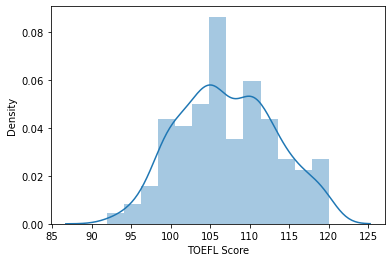

In [8]:
sns.distplot(df['TOEFL Score'])

[]

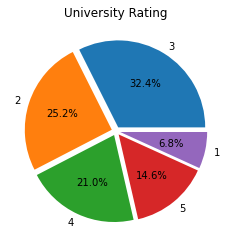

In [9]:
plt.pie(df['University Rating'].value_counts(),[0.05,0.05,0.05,0.05,0.05],df['University Rating'].value_counts().index,autopct='%1.1f%%')
plt.title('University Rating')
plt.plot()

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Research'>

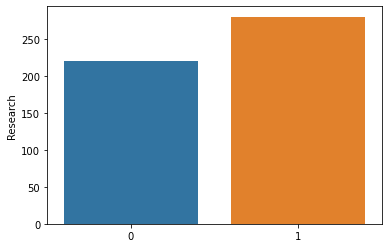

In [10]:
sns.barplot(df.Research.value_counts().index,df.Research.value_counts())

# BIVARIANTE ANALYSIS

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

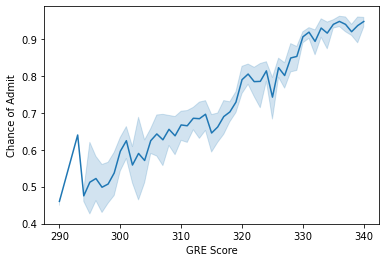

In [11]:
sns.lineplot(df['GRE Score'],df['Chance of Admit'])

In [12]:
def countplot_2(x,hue,title=None,figsize=(12,10)):
    plt.figure(figsize=figsize)
    sns.countplot(data = df[[x,hue]],x=x,hue=hue)
    plt.title(title)
    plt.plot()

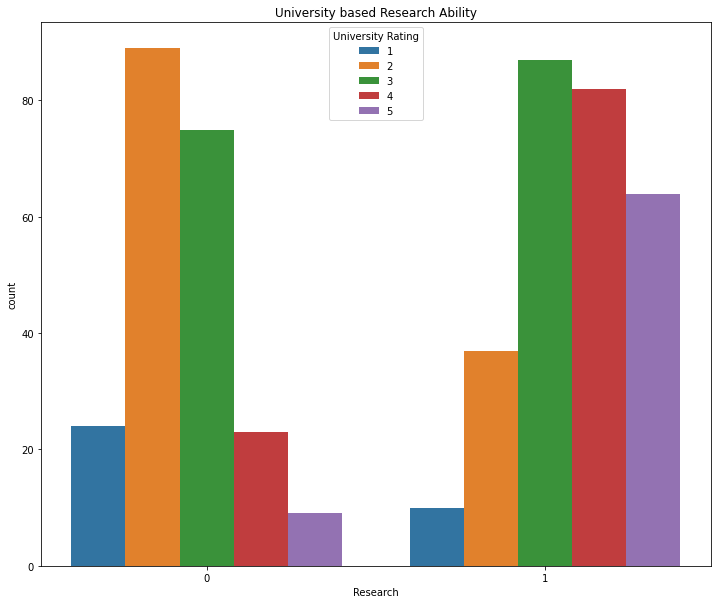

In [13]:
countplot_2('Research','University Rating','University based Research Ability')

# MULTIVARIANTE ANALYSIS

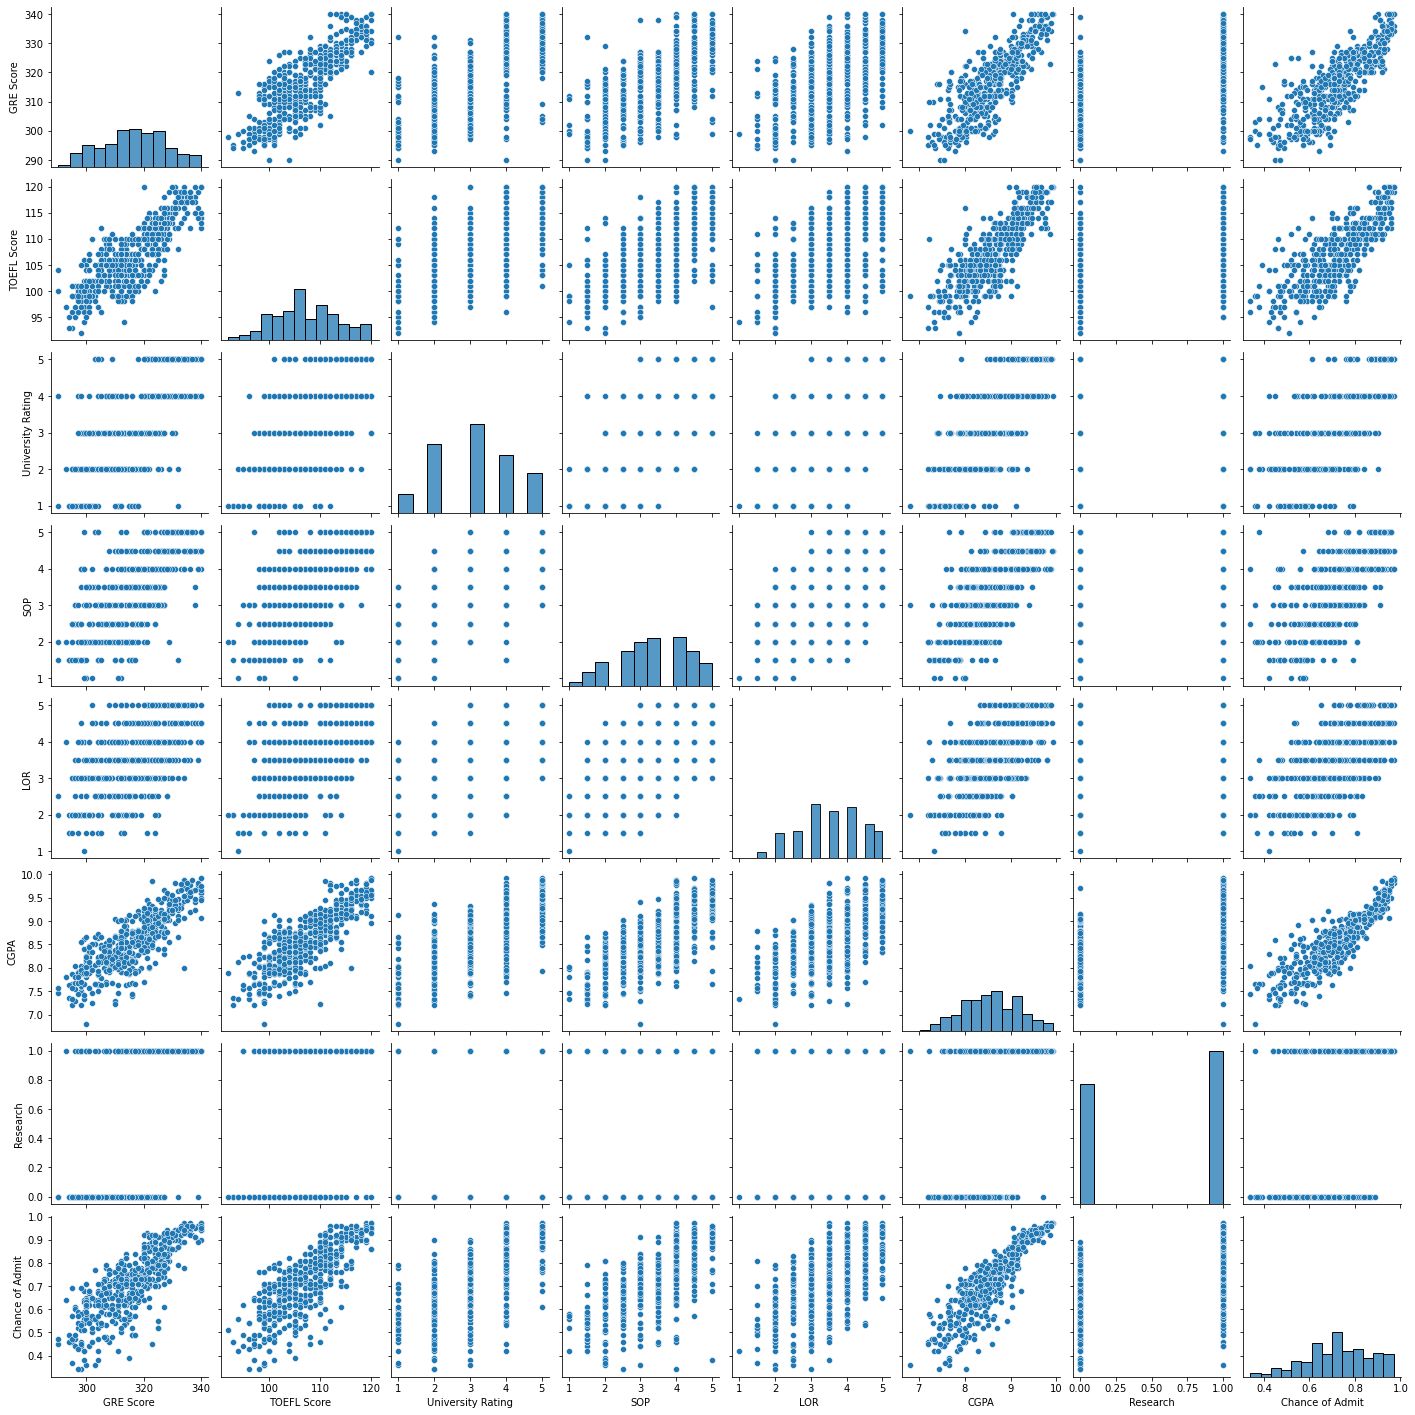

In [14]:
sns.pairplot(df)

In [15]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


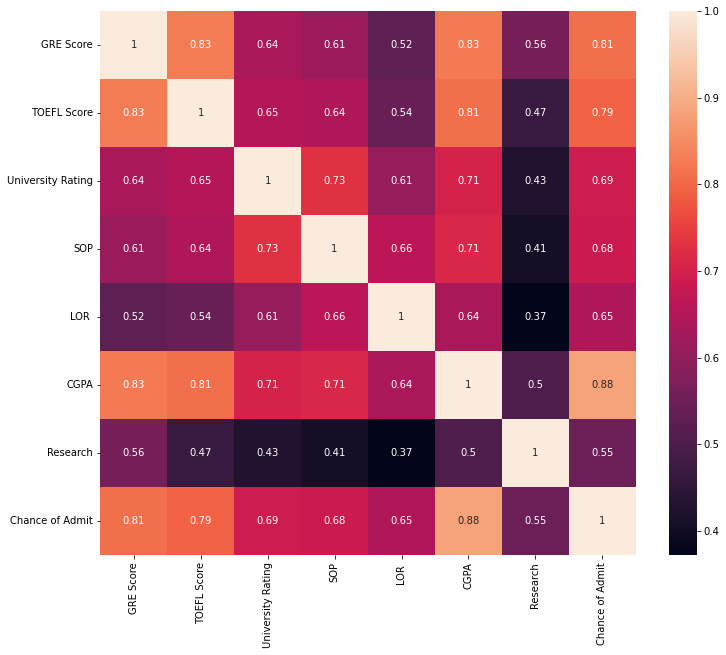

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# FIND THE OUTLIERS AND REPLACE THEM

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


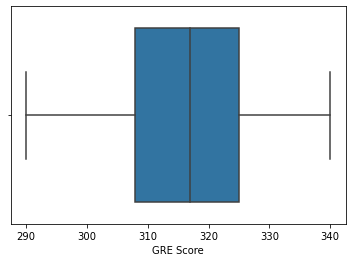

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


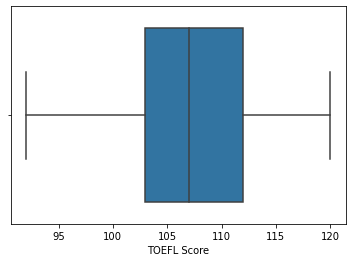

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


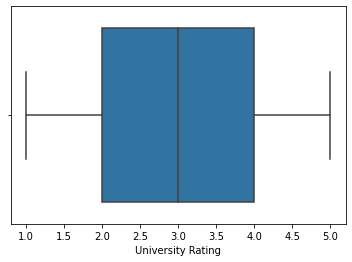

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


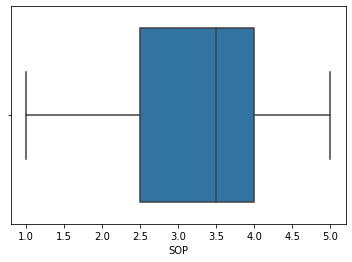

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


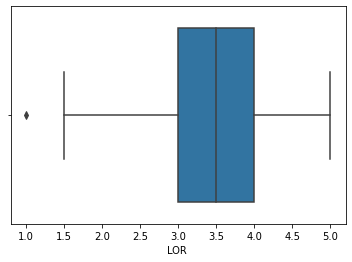

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


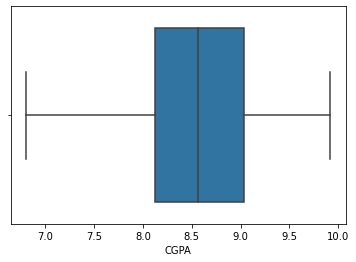

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


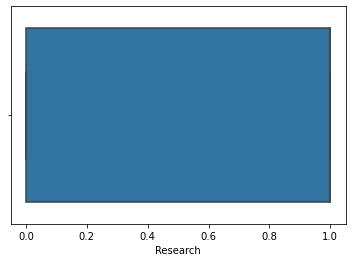

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


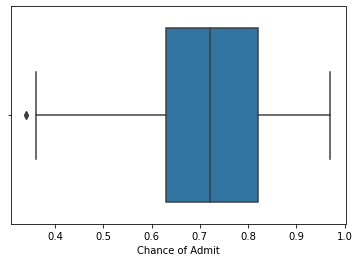

In [17]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [18]:
for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    df[i] = np.where(df[i]>=upper_limit,Q3 + (1.5*IQR),df[i])
    df[i] = np.where(df[i]<=lower_limit,Q1 - (1.5*IQR),df[i])

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


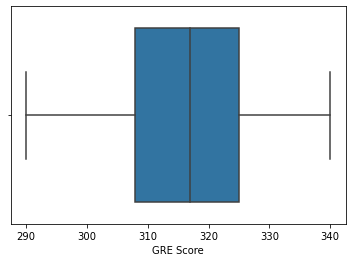

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


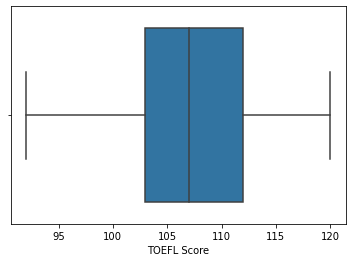

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


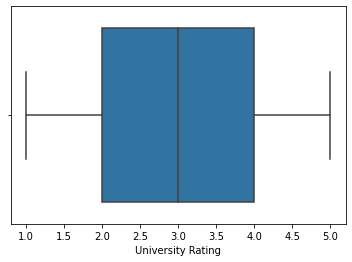

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


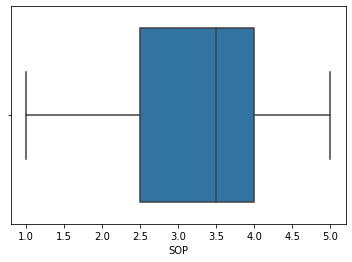

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


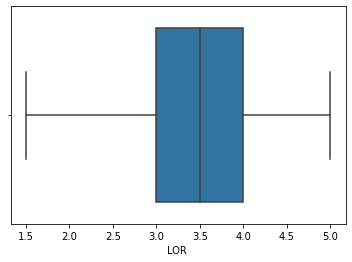

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


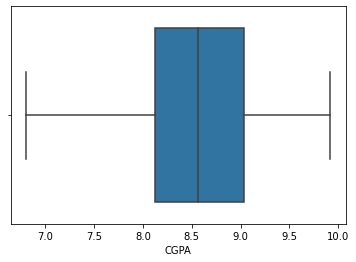

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


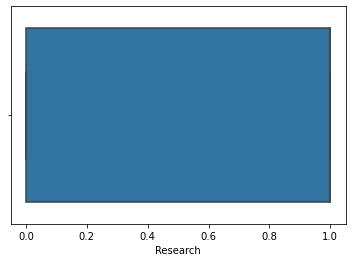

C:\Users\Prem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


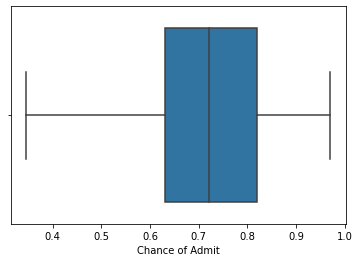

In [19]:
for i in  df.columns:
    sns.boxplot(df[i])
    plt.show()

# ENCODING
**The Dataset has all columns in Numerical Format. So , Encoding is not Required**

# SPLITTING THE DATA INTO DEPENDENT AND INDEPENDENT  VARIABLES

In [20]:
X = df.drop(columns=['Chance of Admit'])
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1.0
1,324.0,107.0,4.0,4.0,4.5,8.87,1.0
2,316.0,104.0,3.0,3.0,3.5,8.00,1.0
3,322.0,110.0,3.0,3.5,2.5,8.67,1.0
4,314.0,103.0,2.0,2.0,3.0,8.21,0.0
...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1.0
496,337.0,117.0,5.0,5.0,5.0,9.87,1.0
497,330.0,120.0,5.0,4.5,5.0,9.56,1.0
498,312.0,103.0,4.0,4.0,5.0,8.43,0.0


In [21]:
Y = pd.DataFrame(df['Chance of Admit'])
Y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


# SCALING THE DATA

In [22]:
'''from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_Scaled = pd.DataFrame(scale.fit_transform(X),columns = X.columns)
target_scale = MinMaxScaler()
Y_Scaled = pd.DataFrame(target_scale.fit_transform(Y),columns = Y.columns)'''

'from sklearn.preprocessing import MinMaxScaler\nscale = MinMaxScaler()\nX_Scaled = pd.DataFrame(scale.fit_transform(X),columns = X.columns)\ntarget_scale = MinMaxScaler()\nY_Scaled = pd.DataFrame(target_scale.fit_transform(Y),columns = Y.columns)'

# SPLITTING INTO TRAINING AND TESTING DATASET

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=90)

# BUILD THE MODEL

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# TRAIN THE MODEL

In [25]:
model.fit(x_train,y_train)

LinearRegression()

# TEST THE MODEL

In [26]:
y_test.to_numpy().flatten()

array([0.56, 0.82, 0.71, 0.85, 0.47, 0.77, 0.95, 0.74, 0.62, 0.56, 0.67,
       0.72, 0.86, 0.46, 0.71, 0.57, 0.45, 0.7 , 0.64, 0.74, 0.73, 0.81,
       0.8 , 0.61, 0.63, 0.64, 0.54, 0.91, 0.63, 0.82, 0.69, 0.48, 0.58,
       0.65, 0.52, 0.74, 0.79, 0.54, 0.44, 0.47, 0.62, 0.8 , 0.76, 0.76,
       0.52, 0.94, 0.62, 0.53, 0.72, 0.73, 0.91, 0.89, 0.79, 0.58, 0.95,
       0.79, 0.73, 0.78, 0.72, 0.96, 0.84, 0.72, 0.89, 0.62, 0.61, 0.93,
       0.67, 0.46, 0.8 , 0.67, 0.7 , 0.71, 0.87, 0.71, 0.96, 0.57, 0.87,
       0.89, 0.54, 0.62, 0.73, 0.61, 0.53, 0.96, 0.57, 0.88, 0.72, 0.51,
       0.93, 0.91, 0.77, 0.39, 0.58, 0.68, 0.82, 0.76, 0.69, 0.67, 0.76,
       0.73])

In [27]:
y_predict = model.predict(x_test)
pd.DataFrame({'Actual':y_test.to_numpy().flatten(),'Predicted':y_predict.flatten()})

,Actual,Predicted
0,0.56,0.616517
1,0.82,0.805325
2,0.71,0.682318
3,0.85,0.832543
4,0.47,0.487288
...,...,...
95,0.76,0.732623
96,0.69,0.671654
97,0.67,0.649773
98,0.76,0.793692


# EVALUATE THE PERFORMANCE USING METRICS

# R2 Score

In [38]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_predict))

0.8724323452611149


87%

# Mean Absolute Error

In [39]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_predict))

0.039251015019866026


0.039

# Mean Squared Error

In [40]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_predict))

0.0025295186149925943


0.0025

# Root Mean Squared Error

In [41]:
print(mean_squared_error(y_test,y_predict,squared=False))

0.05029431990784441


0.05

In [29]:
import joblib
joblib.dump(model,r'model/Admission_Predictor.pkl')

['model/Admission_Predictor.pkl']